In [7]:
#pip install yfinance
!pip install tensorflow

In [142]:
#We will be taking Amazon stock data for last 10 years 
import yfinance as yfin

In [143]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)

In [144]:
stock = "AMZN"
amzn_stock_data = yfin.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [145]:
#Begin the Data Analysis
amzn_stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2010-01-08,6.6760,6.6840,6.4515,6.5280,196610000
2010-01-11,6.5155,6.6400,6.4605,6.6310,175588000
2010-01-12,6.3675,6.4910,6.3275,6.4495,181926000
2010-01-13,6.4555,6.4855,6.2875,6.3950,214464000
2010-01-14,6.3675,6.5190,6.3200,6.4570,195498000


In [146]:
amzn_stock_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
count,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,71.674725,72.505542,70.802330,71.690835,8.306452e+07
std,61.287694,62.010576,60.555171,61.316118,5.162234e+07
min,5.430500,5.564500,5.290000,5.296500,1.500750e+07
25%,15.020000,15.220375,14.834875,15.018375,5.230412e+07
50%,48.551750,48.992750,48.159250,48.729000,6.992300e+07
75%,121.170000,123.087500,119.276999,121.481125,9.864250e+07
max,232.929993,233.000000,228.009995,232.389999,8.484220e+08


In [147]:
amzn_stock_data.shape

(3774, 5)

In [148]:
#check for null values in the dataset
amzn_stock_data.isna()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2010-01-08,False,False,False,False,False
2010-01-11,False,False,False,False,False
2010-01-12,False,False,False,False,False
2010-01-13,False,False,False,False,False
2010-01-14,False,False,False,False,False
...,...,...,...,...,...
2024-12-31,False,False,False,False,False
2025-01-02,False,False,False,False,False


In [149]:
# We will check for the missing values and by doing sum we can find the number of records with null value
amzn_stock_data.isna().sum()

Price   Ticker
Close   AMZN      0
High    AMZN      0
Low     AMZN      0
Open    AMZN      0
Volume  AMZN      0
dtype: int64

In [150]:
#Graphical representation of data to understand the data trend
#import numpy as np
#import pandas as pd
import matplotlib.pyplot as amz_plot
%matplotlib inline

In [151]:
#Plot the graph for all the values in the data set to see the trend 
#define a function for graph
def plt_graph(figsize, value, col_name):
   amz_plot.figure()
   value.plot(figsize = figsize)
   amz_plot.title(f"{col_name} graph of Amazon data")
   amz_plot.xlabel("Year")
   amz_plot.ylabel(col_name) 
   amz_plot.show()

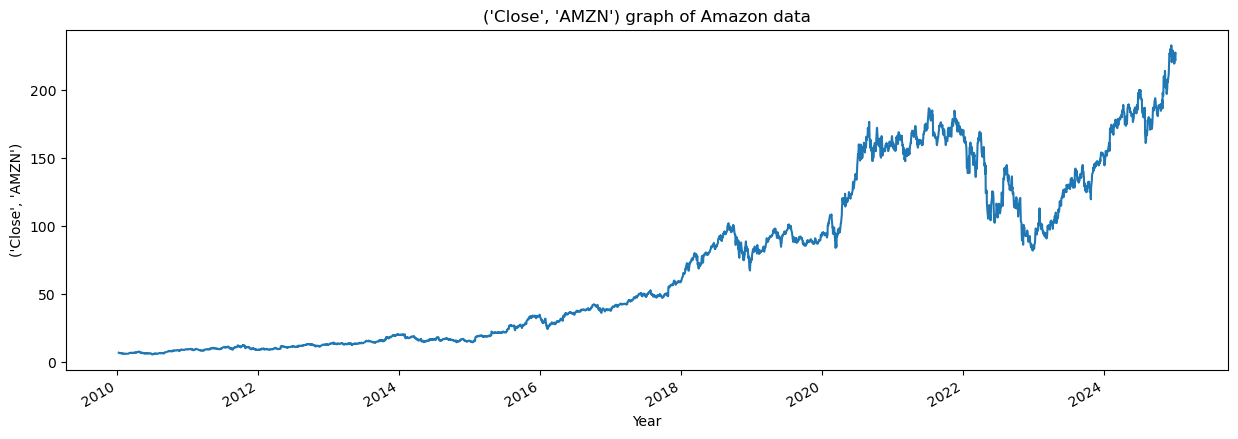

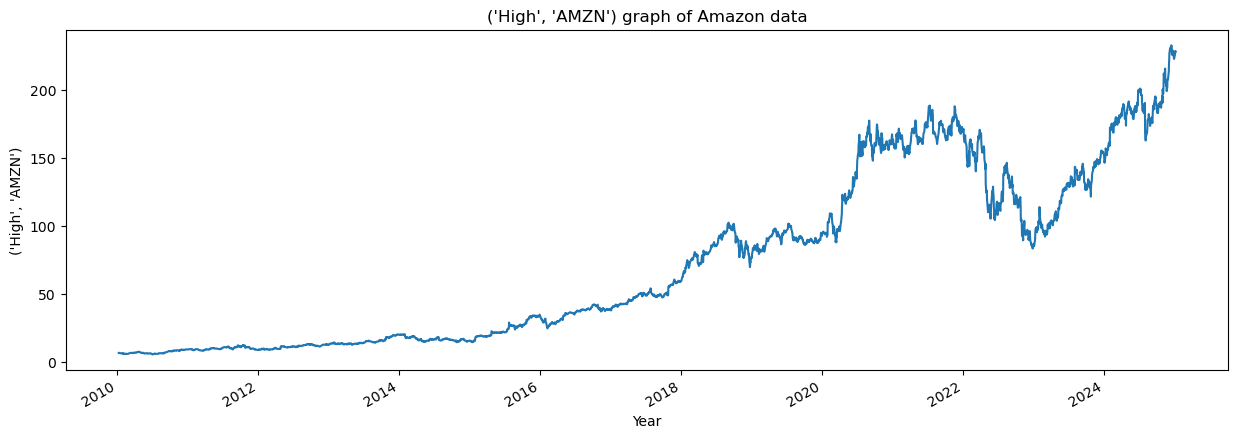

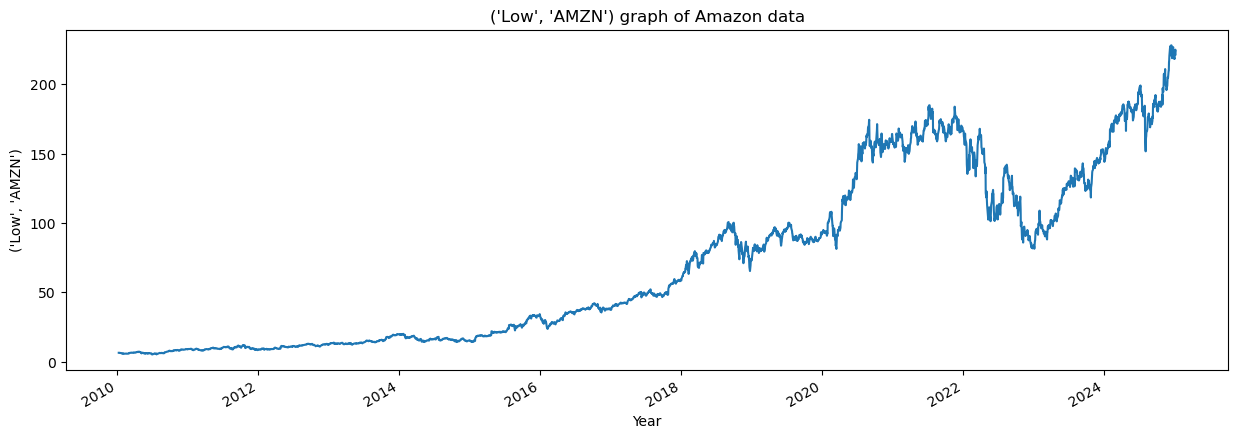

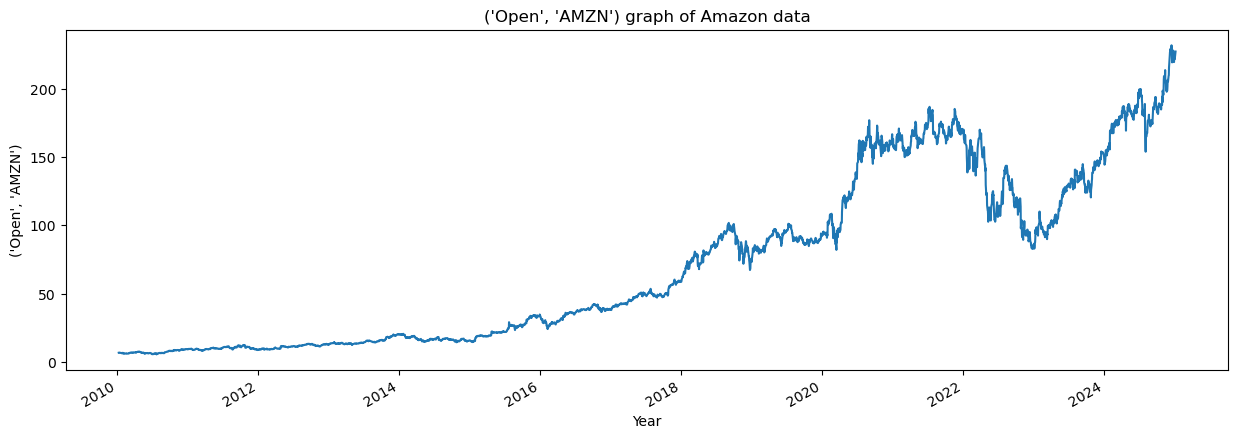

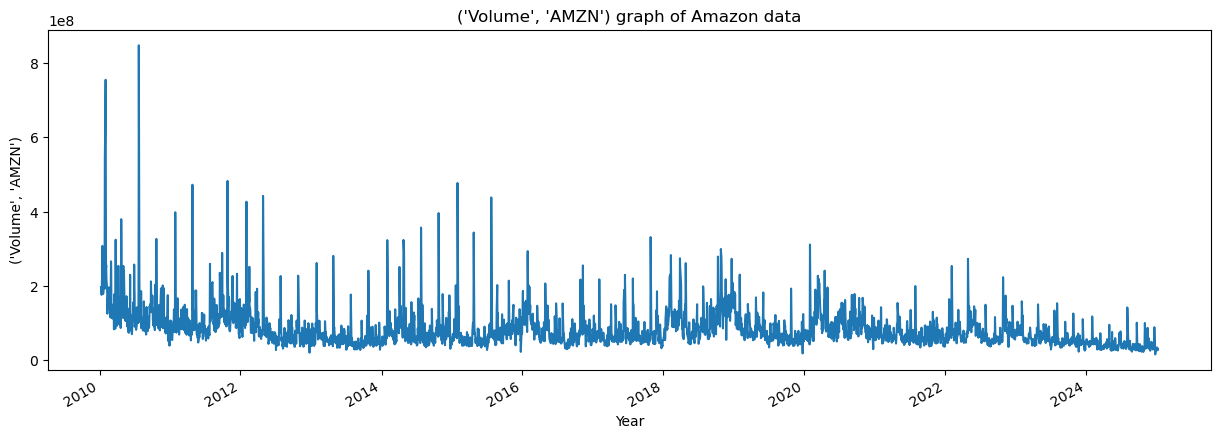

In [152]:
for col in amzn_stock_data.columns:
   plt_graph((15,5),amzn_stock_data[col],col)
    

In [74]:
# Moving Average method used for data smoothing to make trends more apparent. 
#We will take four different ranges of data and compare which range gives more relevant trend when compared to the original data

#first we will find the no of records for each year

In [153]:
for x in range(2010,2025):
    print(x, list(amzn_stock_data.index.year).count(x))

2010 248
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [154]:
# on avg we have 250 records for each year, we will consider three ranges 100, 175, 250
amzn_stock_data['MA_for_100_days'] = amzn_stock_data['Close'].rolling(100).mean()

In [155]:
amzn_stock_data['MA_for_100_days'][0:100].tail()

Date
2010-05-26        NaN
2010-05-27        NaN
2010-05-28        NaN
2010-06-01        NaN
2010-06-02    6.45369
Name: MA_for_100_days, dtype: float64

In [156]:
amzn_stock_data['MA_for_175_days'] = amzn_stock_data['Close'].rolling(175).mean()

In [157]:
amzn_stock_data['MA_for_175_days'][0:175].tail()

Date
2010-09-13      NaN
2010-09-14      NaN
2010-09-15      NaN
2010-09-16      NaN
2010-09-17    6.366
Name: MA_for_175_days, dtype: float64

In [158]:
amzn_stock_data['MA_for_250_days'] = amzn_stock_data['Close'].rolling(250).mean()

In [159]:
amzn_stock_data['MA_for_250_days'][0:250].tail()

Date
2010-12-29         NaN
2010-12-30         NaN
2010-12-31         NaN
2011-01-03         NaN
2011-01-04    6.980354
Name: MA_for_250_days, dtype: float64

<Figure size 640x480 with 0 Axes>

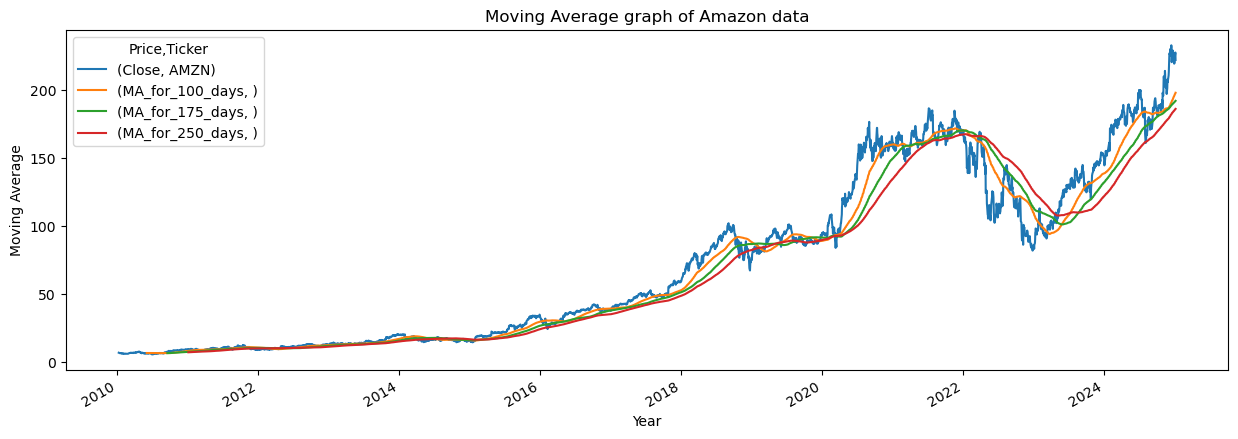

In [160]:
plt_graph((15,5),amzn_stock_data[['Close','MA_for_100_days','MA_for_175_days','MA_for_250_days']],'Moving Average')

In [161]:
amzn_stock_data['MA_for_75_days'] = amzn_stock_data['Close'].rolling(75).mean()

<Figure size 640x480 with 0 Axes>

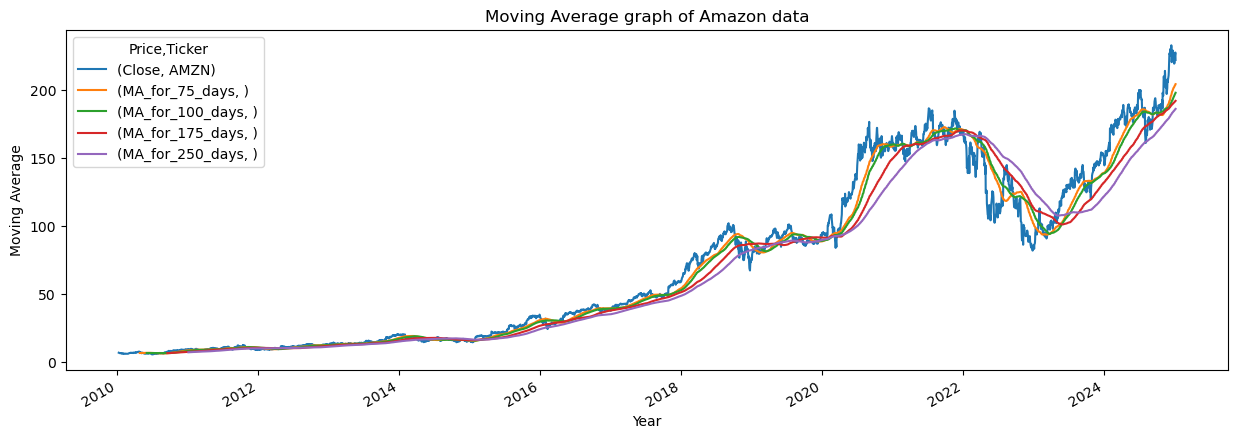

In [162]:
plt_graph((15,5),amzn_stock_data[['Close','MA_for_75_days','MA_for_100_days','MA_for_175_days','MA_for_250_days']],'Moving Average')

In [88]:
## Moving Average of 100 days shows more relevant trend compared to 75,175 and 250 days range
#Data Analysis completed

In [163]:
#Data preprocessing.
#First we need to normalise the data in the scale of 0 to 1 to ensure fast processing of data.

Stock_close_price = amzn_stock_data[['Close']]

In [164]:
#min value in data
min(Stock_close_price.values)

array([5.43050003])

In [165]:
#max value in data
max(Stock_close_price.values)

array([232.92999268])

In [166]:
# Using MinMaxScaler we will scale the values from min to max in range of 0 t 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
amzn_scaled_data = scaler.fit_transform(Stock_close_price)
amzn_scaled_data

array([[0.00547474],
       [0.00476924],
       [0.00411869],
       ...,
       [0.96158237],
       [0.97661537],
       [0.95243949]])

In [167]:
#check the count of scaled data and original data it should be same.
len(amzn_scaled_data)

3774

In [168]:
len(amzn_stock_data)

3774

In [170]:
##using the range identified by using Moving average (100) we will create xdata set and ydata set
# using the concept of moving average, we will calculate the 101st value based on the 1 to 100 values, 
#similarly 102nd value will be calculated based on 2 to 101 values, this process will be repeated till we reach 3775th value.

xdata = []
ydata = []

for j in range(100, len(amzn_scaled_data)):
    xdata.append(amzn_scaled_data[j-100:j])
    ydata.append(amzn_scaled_data[j])

In [171]:
import numpy as np
xdata,ydata  = np.array(xdata), np.array(ydata)
xdata[0], ydata[0]

(array([[0.00547474],
        [0.00476924],
        [0.00411869],
        [0.0045055 ],
        [0.00411869],
        [0.00407254],
        [0.00417583],
        [0.00377363],
        [0.00395825],
        [0.00281759],
        [0.00257143],
        [0.00238902],
        [0.0031077 ],
        [0.00382858],
        [0.00369232],
        [0.00225495],
        [0.00209012],
        [0.0023055 ],
        [0.00161099],
        [0.00192968],
        [0.0018066 ],
        [0.00207034],
        [0.00192308],
        [0.00252308],
        [0.00242858],
        [0.00196044],
        [0.00169231],
        [0.00208132],
        [0.00195825],
        [0.00206594],
        [0.00189671],
        [0.00244176],
        [0.0021077 ],
        [0.00215165],
        [0.00350111],
        [0.00371869],
        [0.00379781],
        [0.00437803],
        [0.00446155],
        [0.00472528],
        [0.00444177],
        [0.0048132 ],
        [0.00548792],
        [0.00510111],
        [0.00494946],
        [0

In [173]:
xdata[1], ydata[1]

(array([[0.00476924],
        [0.00411869],
        [0.0045055 ],
        [0.00411869],
        [0.00407254],
        [0.00417583],
        [0.00377363],
        [0.00395825],
        [0.00281759],
        [0.00257143],
        [0.00238902],
        [0.0031077 ],
        [0.00382858],
        [0.00369232],
        [0.00225495],
        [0.00209012],
        [0.0023055 ],
        [0.00161099],
        [0.00192968],
        [0.0018066 ],
        [0.00207034],
        [0.00192308],
        [0.00252308],
        [0.00242858],
        [0.00196044],
        [0.00169231],
        [0.00208132],
        [0.00195825],
        [0.00206594],
        [0.00189671],
        [0.00244176],
        [0.0021077 ],
        [0.00215165],
        [0.00350111],
        [0.00371869],
        [0.00379781],
        [0.00437803],
        [0.00446155],
        [0.00472528],
        [0.00444177],
        [0.0048132 ],
        [0.00548792],
        [0.00510111],
        [0.00494946],
        [0.00509452],
        [0

In [98]:
#As we can see the ydata is predicted based on the 100 values in xdata

In [99]:
#Splitting the data
# for that we will split the data set in to training set 70% and testing set 30% .

In [174]:
split_pct = int(len(xdata)*0.7)
xtrain = xdata[:split_pct]
ytrain = ydata[:split_pct]

xtest = xdata[split_pct:]
ytest = ydata[split_pct:]

In [175]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(2571, 100, 1)
(2571, 1)
(1103, 100, 1)
(1103, 1)


In [102]:
# Building the neural network model to train the model to predict the prices
#We are going to use LSTM and  Dense layers to build the Neural Network model for prediction.

In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [179]:
# we are using sequential model so that it transfers the data from input layer to the multiple series of layers and then to the output layer
# We are setting return_sequences=True for 1st LSTM layers so that the second LSTM layer has a multi-dimensional sequence input

amzn_model = Sequential()
amzn_model.add(LSTM(128, return_sequences = True, input_shape=(xtrain.shape[1],1)))
amzn_model.add(LSTM(75, return_sequences = False))
amzn_model.add(Dense(25))
amzn_model.add(Dense(1))

In [180]:
amzn_model.compile(optimizer='adam', loss='mean_squared_error')

In [183]:
amzn_model.fit(xtrain,ytrain,batch_size=1, epochs=2)

Epoch 1/2
2571/2571 ━━━━━━━━━━━━━━━━━━━━ 90s 35ms/step - loss: 1.2132e-04
Epoch 2/2
2571/2571 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - loss: 1.0987e-04


In [184]:
amzn_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 75)                  │          61,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 25)                  │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 389,060 (1.48 MB)

 Trainable params: 129,686 (506.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 259,374 (1013.18 KB)

In [185]:
## Now the model is trained so using this model we will predict the prices for test data

amzn_predictions = amzn_model.predict(xtest)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


In [186]:
amzn_predictions

array([[0.7367289 ],
       [0.7261207 ],
       [0.7330798 ],
       ...,
       [0.99779314],
       [1.017701  ],
       [1.0350358 ]], dtype=float32)

In [188]:
inv_amzn_predictions = scaler.inverse_transform(amzn_predictions)

In [189]:
inv_amzn_predictions

array([[173.03596],
       [170.6226 ],
       [172.20578],
       ...,
       [232.42793],
       [236.95695],
       [240.90062]], dtype=float32)

In [190]:
inv_ytest = scaler.inverse_transform(ytest)

In [192]:
inv_ytest

array([[163.02400208],
       [164.86849976],
       [164.23599243],
       ...,
       [224.19000244],
       [227.61000061],
       [222.11000061]])

In [206]:
#To evaluate the accuracy of a model's predictions, we will check the root mean square error - rmse for predicted and actuals value
amzn_rmse=np.sqrt(np.mean((inv_amzn_predictions-inv_ytest)**2))

In [207]:
amzn_rmse

7.5193840250307105

In [208]:
import pandas as pd
amzn_plottingdata = pd.DataFrame(
{
    'Original Test Data': inv_ytest.reshape(-1),
    'Predictions':inv_amzn_predictions.reshape(-1)
} ,
    index = amzn_stock_data.index[split_pct+100:]
)    
amzn_plottingdata.head()

,Original Test Data,Predictions
Date,,
2020-08-19,163.024002,173.035965
2020-08-20,164.868500,170.622604
2020-08-21,164.235992,172.205780
2020-08-24,165.373001,171.575928
2020-08-25,167.324493,172.702728


In [209]:
amzn_plottingdata.tail()

,Original Test Data,Predictions
Date,,
2024-12-31,219.389999,233.497879
2025-01-02,220.220001,231.431549
2025-01-03,224.190002,232.427933
2025-01-06,227.610001,236.956955
2025-01-07,222.110001,240.900620


<Figure size 640x480 with 0 Axes>

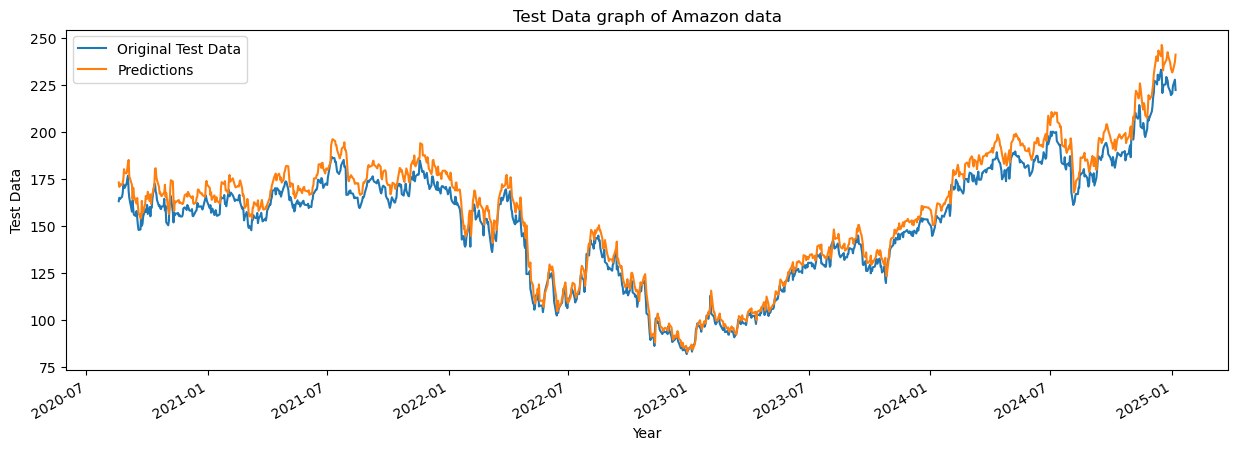

In [211]:
plt_graph((15,5),amzn_plottingdata,'Test Data')

In [212]:
amzn_model.save("w1943544_Amazon_Stock_Price_Model.keras")

In [ ]:
#The original data(Orange) and the predicted data (green) follow almost the same curve. 